# Make pretty graphs

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

In [51]:
def bounds_graph(bounds_dict, title, savepath, bottom=-0.05):
    # group by bound type
    # show different colors for different subgroups
    group_dict = {'all_no_demographic' : 'All', 'black' : 'Black', 'white' : 'White', 'female' : 'Female', 'male': 'Male'}
    bound_dict = {'maha': 'Mahalanobis', 'nn': 'Nearest Neighbor'}
    for i, bound_type in enumerate(['maha', 'nn']):        
        for j, group in enumerate(['all_no_demographic', 'black', 'white', 'female', 'male']):
            lims = bounds_dict[bound_type][group]
            if bound_type == 'maha':
                lims = (0, lims)
            label = group_dict[group] if i == 0 else None
            plt.plot([0.8*i+j*0.1, 0.8*i+j*0.1], lims, c=f'C{j}', label=label)
            plt.hlines(lims, 0.8*i+j*0.1 - 0.03, 0.8*i+j*0.1 + 0.03, colors=f'C{j}')
    plt.ylim(bottom=bottom)
    plt.xticks([0.2, 1.0], ['Mahalanobis', 'Nearest Neighbor'])
    plt.yticks(np.arange(0, plt.gca().get_ylim()[1], 0.05))
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(savepath, dpi=300)

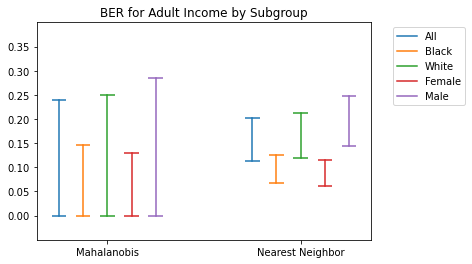

In [45]:
bounds_graph(pkl.load(open("adult_bounds.pkl", "rb")), "BER for Adult Income by Subgroup", "plots/adult.png")

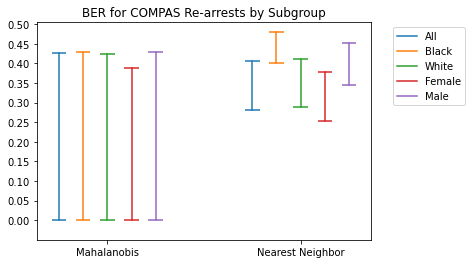

In [48]:
bounds_graph(pkl.load(open("compas_arrest_bounds.pkl", "rb")), "BER for COMPAS Re-arrests by Subgroup", "plots/compas_arrest.png")

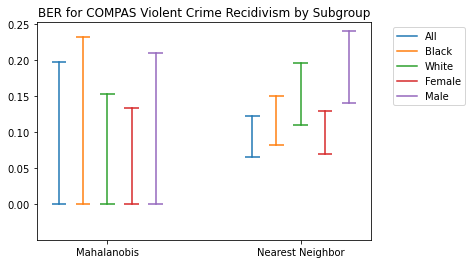

In [49]:
bounds_graph(pkl.load(open("compas_violent_bounds.pkl", "rb")), 
             "BER for COMPAS Violent Crime Recidivism by Subgroup", 
             "plots/compas_violent.png")

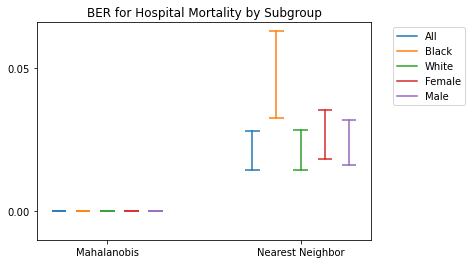

In [52]:
bounds_graph(pkl.load(open("mimic_bounds.pkl", "rb")), 
             "BER for Hospital Mortality by Subgroup", 
             "plots/mimic.png", bottom=-0.01)